In [1]:
# Imports

import pandas as pd
import nltk
import spacy
from nltk import PorterStemmer

In [2]:
# Read CSV

df = pd.read_csv('winemag-data.csv', index_col=0)

In [3]:
# Head check

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
# Dupe check

df.duplicated().sum()

np.int64(9983)

In [5]:
# Drop 9983 duplicates

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [6]:
# Info check

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


In [7]:
# Keep only text and rating column

df = df[['description', 'points']]
df

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90
129967,Citation is given as much as a decade of bottl...,90
129968,Well-drained gravel soil gives this wine its c...,90
129969,"A dry style of Pinot Gris, this is crisp with ...",90


In [8]:
# NA check -- 0 nans

df.isna().sum()

description    0
points         0
dtype: int64

In [9]:
# Take a look at points counts

df['points'].value_counts().sort_index(ascending=False)

points
100       19
99        33
98        77
97       228
96       521
95      1514
94      3625
93      6170
92      8951
91     10559
90     13893
89     11147
88     15291
87     15279
86     11526
85      9067
84      6225
83      2963
82      1814
81       689
80       397
Name: count, dtype: int64

<Axes: >

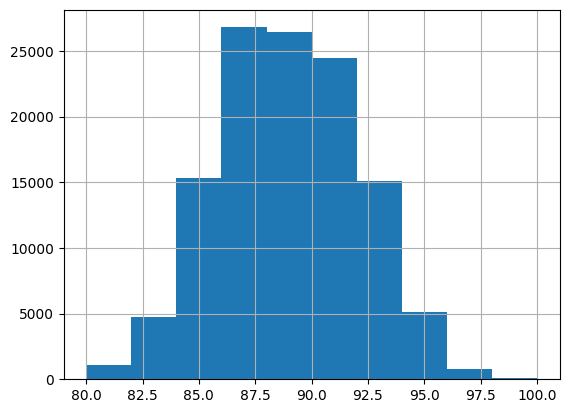

In [10]:
# Plot points counts -- distribution looks very close to normal

df['points'].hist()

In [11]:
# Look at character counts of reviews

df['char_count'] = df['description'].str.len()
df.head()

,description,points,char_count
0,"Aromas include tropical fruit, broom, brimston...",87,172
1,"This is ripe and fruity, a wine that is smooth...",87,227
2,"Tart and snappy, the flavors of lime flesh and...",87,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,199
4,"Much like the regular bottling from 2012, this...",87,249


<Axes: >

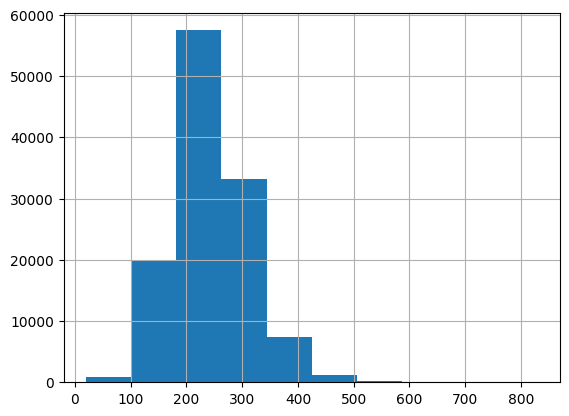

In [13]:
# Look at character count distribution

df['char_count'].hist()

# 1 Tokenize description feature


In [ ]:
# downloads for tokenizer

nltk.download('punkt')
nltk.download('punkt_tab')

In [14]:
# make description lowercase

df['lower'] = df['description'].str.lower()
df.head()

,description,points,char_count,lower
0,"Aromas include tropical fruit, broom, brimston...",87,172,"aromas include tropical fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth...",87,227,"this is ripe and fruity, a wine that is smooth..."
2,"Tart and snappy, the flavors of lime flesh and...",87,186,"tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ...",87,199,"pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this...",87,249,"much like the regular bottling from 2012, this..."


In [15]:
# make tokened column

df['tokens'] = df['lower'].apply(nltk.word_tokenize)
df.head()

,description,points,char_count,lower,tokens
0,"Aromas include tropical fruit, broom, brimston...",87,172,"aromas include tropical fruit, broom, brimston...","[aromas, include, tropical, fruit, ,, broom, ,..."
1,"This is ripe and fruity, a wine that is smooth...",87,227,"this is ripe and fruity, a wine that is smooth...","[this, is, ripe, and, fruity, ,, a, wine, that..."
2,"Tart and snappy, the flavors of lime flesh and...",87,186,"tart and snappy, the flavors of lime flesh and...","[tart, and, snappy, ,, the, flavors, of, lime,..."
3,"Pineapple rind, lemon pith and orange blossom ...",87,199,"pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, ,, lemon, pith, and, orange,..."
4,"Much like the regular bottling from 2012, this...",87,249,"much like the regular bottling from 2012, this...","[much, like, the, regular, bottling, from, 201..."


# 2 Remove Stopwords

In [31]:
# stopwords imports

nltk.download('stopwords')
from string import punctuation


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nick_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Make stopwords list and check work

stopwords = nltk.corpus.stopwords.words('english')
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [32]:
# Check punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
# create stopword list

# make punctution into list

punc = [p for p in punctuation]

# Combine stopwords and puctuTION

stopwords = stopwords + punc
stopwords


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
# remove stops and punctuation

def remove_stopwords(text):
  return [word for word in text if word not in stopwords]

df['no_stop'] = df['tokens'].apply(remove_stopwords)
df.head()

,description,points,char_count,lower,tokens,no_stop
0,"Aromas include tropical fruit, broom, brimston...",87,172,"aromas include tropical fruit, broom, brimston...","[aromas, include, tropical, fruit, ,, broom, ,...","[aromas, include, tropical, fruit, broom, brim..."
1,"This is ripe and fruity, a wine that is smooth...",87,227,"this is ripe and fruity, a wine that is smooth...","[this, is, ripe, and, fruity, ,, a, wine, that...","[ripe, fruity, wine, smooth, still, structured..."
2,"Tart and snappy, the flavors of lime flesh and...",87,186,"tart and snappy, the flavors of lime flesh and...","[tart, and, snappy, ,, the, flavors, of, lime,...","[tart, snappy, flavors, lime, flesh, rind, dom..."
3,"Pineapple rind, lemon pith and orange blossom ...",87,199,"pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, ,, lemon, pith, and, orange,...","[pineapple, rind, lemon, pith, orange, blossom..."
4,"Much like the regular bottling from 2012, this...",87,249,"much like the regular bottling from 2012, this...","[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a..."


# 3 Stem the tokens

In [45]:
# create porter stemmer instance

stems = PorterStemmer()

In [46]:
# Create stemmer function

def stemmer(text):
  return [stems.stem(word) for word in text]

In [48]:
# apply stemmer function to text

df['stemmed'] = df['no_stop'].apply(stemmer)
df

,description,points,char_count,lower,tokens,no_stop,stemmed
0,"Aromas include tropical fruit, broom, brimston...",87,172,"aromas include tropical fruit, broom, brimston...","[aromas, include, tropical, fruit, ,, broom, ,...","[aromas, include, tropical, fruit, broom, brim...","[aroma, includ, tropic, fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth...",87,227,"this is ripe and fruity, a wine that is smooth...","[this, is, ripe, and, fruity, ,, a, wine, that...","[ripe, fruity, wine, smooth, still, structured...","[ripe, fruiti, wine, smooth, still, structur, ..."
2,"Tart and snappy, the flavors of lime flesh and...",87,186,"tart and snappy, the flavors of lime flesh and...","[tart, and, snappy, ,, the, flavors, of, lime,...","[tart, snappy, flavors, lime, flesh, rind, dom...","[tart, snappi, flavor, lime, flesh, rind, domi..."
3,"Pineapple rind, lemon pith and orange blossom ...",87,199,"pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, ,, lemon, pith, and, orange,...","[pineapple, rind, lemon, pith, orange, blossom...","[pineappl, rind, lemon, pith, orang, blossom, ..."
4,"Much like the regular bottling from 2012, this...",87,249,"much like the regular bottling from 2012, this...","[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[much, like, regular, bottl, 2012, come, acros..."
...,...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,227,notes of honeysuckle and cantaloupe sweeten th...,"[notes, of, honeysuckle, and, cantaloupe, swee...","[notes, honeysuckle, cantaloupe, sweeten, deli...","[note, honeysuckl, cantaloup, sweeten, delici,..."
129967,Citation is given as much as a decade of bottl...,90,233,citation is given as much as a decade of bottl...,"[citation, is, given, as, much, as, a, decade,...","[citation, given, much, decade, bottle, age, p...","[citat, given, much, decad, bottl, age, prior,..."
129968,Well-drained gravel soil gives this wine its c...,90,225,well-drained gravel soil gives this wine its c...,"[well-drained, gravel, soil, gives, this, wine...","[well-drained, gravel, soil, gives, wine, cris...","[well-drain, gravel, soil, give, wine, crisp, ..."
129969,"A dry style of Pinot Gris, this is crisp with ...",90,216,"a dry style of pinot gris, this is crisp with ...","[a, dry, style, of, pinot, gris, ,, this, is, ...","[dry, style, pinot, gris, crisp, acidity, also...","[dri, style, pinot, gri, crisp, acid, also, we..."


In [52]:
# rename column to match assignment

df = df.rename(columns={'stemmed':'Cleaned_Stem_Description'})
df

,description,points,char_count,lower,tokens,no_stop,Cleaned_Stem_Description
0,"Aromas include tropical fruit, broom, brimston...",87,172,"aromas include tropical fruit, broom, brimston...","[aromas, include, tropical, fruit, ,, broom, ,...","[aromas, include, tropical, fruit, broom, brim...","[aroma, includ, tropic, fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth...",87,227,"this is ripe and fruity, a wine that is smooth...","[this, is, ripe, and, fruity, ,, a, wine, that...","[ripe, fruity, wine, smooth, still, structured...","[ripe, fruiti, wine, smooth, still, structur, ..."
2,"Tart and snappy, the flavors of lime flesh and...",87,186,"tart and snappy, the flavors of lime flesh and...","[tart, and, snappy, ,, the, flavors, of, lime,...","[tart, snappy, flavors, lime, flesh, rind, dom...","[tart, snappi, flavor, lime, flesh, rind, domi..."
3,"Pineapple rind, lemon pith and orange blossom ...",87,199,"pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, ,, lemon, pith, and, orange,...","[pineapple, rind, lemon, pith, orange, blossom...","[pineappl, rind, lemon, pith, orang, blossom, ..."
4,"Much like the regular bottling from 2012, this...",87,249,"much like the regular bottling from 2012, this...","[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[much, like, regular, bottl, 2012, come, acros..."
...,...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,227,notes of honeysuckle and cantaloupe sweeten th...,"[notes, of, honeysuckle, and, cantaloupe, swee...","[notes, honeysuckle, cantaloupe, sweeten, deli...","[note, honeysuckl, cantaloup, sweeten, delici,..."
129967,Citation is given as much as a decade of bottl...,90,233,citation is given as much as a decade of bottl...,"[citation, is, given, as, much, as, a, decade,...","[citation, given, much, decade, bottle, age, p...","[citat, given, much, decad, bottl, age, prior,..."
129968,Well-drained gravel soil gives this wine its c...,90,225,well-drained gravel soil gives this wine its c...,"[well-drained, gravel, soil, gives, this, wine...","[well-drained, gravel, soil, gives, wine, cris...","[well-drain, gravel, soil, give, wine, crisp, ..."
129969,"A dry style of Pinot Gris, this is crisp with ...",90,216,"a dry style of pinot gris, this is crisp with ...","[a, dry, style, of, pinot, gris, ,, this, is, ...","[dry, style, pinot, gris, crisp, acidity, also...","[dri, style, pinot, gri, crisp, acid, also, we..."


# 4 Lemmatize tokens

In [57]:
# Make model

nlp_model = spacy.load('en_core_web_sm')

In [61]:
# Make lemmatizer fuction

def lemmatizer(text):
  doc = nlp_model(text)
  processed_doc = [token.lemma_ for token in doc
                   if not token.is_stop and not token.is_punct
                   and not token.is_space]

  return processed_doc

In [65]:
# apply lemmatizer function to text

df['Cleaned_Lemma_Description'] = df['lower'].apply(lemmatizer)
df.head()

,description,points,char_count,lower,tokens,no_stop,Cleaned_Stem_Description,Cleaned_Lemma_Description
0,"Aromas include tropical fruit, broom, brimston...",87,172,"aromas include tropical fruit, broom, brimston...","[aromas, include, tropical, fruit, ,, broom, ,...","[aromas, include, tropical, fruit, broom, brim...","[aroma, includ, tropic, fruit, broom, brimston...","[aroma, include, tropical, fruit, broom, brims..."
1,"This is ripe and fruity, a wine that is smooth...",87,227,"this is ripe and fruity, a wine that is smooth...","[this, is, ripe, and, fruity, ,, a, wine, that...","[ripe, fruity, wine, smooth, still, structured...","[ripe, fruiti, wine, smooth, still, structur, ...","[ripe, fruity, wine, smooth, structure, firm, ..."
2,"Tart and snappy, the flavors of lime flesh and...",87,186,"tart and snappy, the flavors of lime flesh and...","[tart, and, snappy, ,, the, flavors, of, lime,...","[tart, snappy, flavors, lime, flesh, rind, dom...","[tart, snappi, flavor, lime, flesh, rind, domi...","[tart, snappy, flavor, lime, flesh, rind, domi..."
3,"Pineapple rind, lemon pith and orange blossom ...",87,199,"pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, ,, lemon, pith, and, orange,...","[pineapple, rind, lemon, pith, orange, blossom...","[pineappl, rind, lemon, pith, orang, blossom, ...","[pineapple, rind, lemon, pith, orange, blossom..."
4,"Much like the regular bottling from 2012, this...",87,249,"much like the regular bottling from 2012, this...","[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[much, like, regular, bottl, 2012, come, acros...","[like, regular, bottling, 2012, come, rough, t..."


# 5 Build a wordcloud based on Cleaned_Lemma_Description

In [66]:
# import

from wordcloud import WordCloud

In [68]:
# make one list with all words

lemma_words = df['Cleaned_Lemma_Description'].explode().astype(str).to_list()
lemma_words = ' '.join(lemma_words)

In [69]:
# create wordcloud with word list

lemma_cloud = WordCloud(min_word_length=2).generate(lemma_words)

Text(0.5, 1.0, 'Words in Positive Tweets')

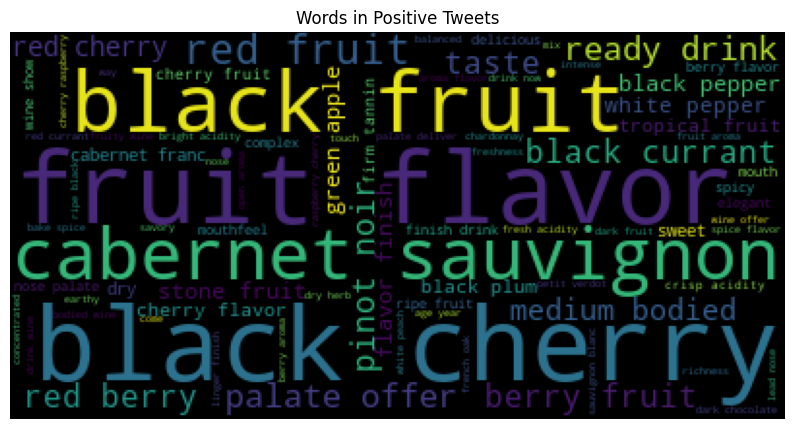

In [76]:
# plot word cloud

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(lemma_cloud)
ax.axis('off')
ax.set_title('Words in Positive Tweets')